# Happiness and World Bank Income inequality Gini measure combined by J.Ward 

In [1]:
#load needed data liberary and KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### show first 2 rows of data

In [2]:
df = pd.read_csv('happyscore_income.csv')#load data

In [3]:
df.head(2)#retriev first 2 rows of data

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola


### sort the intire data by average income

In [4]:
df.sort_values('avg_income', inplace=True)

### load only people who income < 5000

In [5]:
poor_mediam = df[df['avg_income'] < 5000]#load only avg_income < 5000 in seperated dataframe

In [6]:
#make a data income_sat  from only avg_income and avg_satisfaction
income_sat = np.column_stack((poor_mediam['avg_income'], poor_mediam['avg_satisfaction']))

### 2 clusters (k_means)

In [7]:
k_means = KMeans(n_clusters = 2).fit(income_sat)# 2 clusters of  income_sat data
k_means.cluster_centers_#to see the clusters in details

array([[1330.20330088,    4.7475    ],
       [3641.27948718,    6.13461538]])

### Satisfaction Rate by average_income to people who get only < 5000 

Text(0,0.5,'Average_Satisfaction')

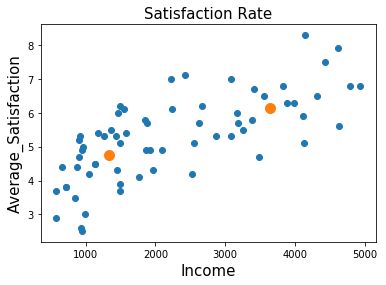

In [8]:
#make the scater of 2 variables and its clusters 
clusters = k_means.cluster_centers_
plt.scatter(poor_mediam['avg_income'], poor_mediam['avg_satisfaction'])
plt.scatter(clusters[:,0], clusters[:,1], s =100)
plt.title('Satisfaction Rate', fontsize=15)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Average_Satisfaction', fontsize=15)

### conclusion <br>
* as you see Satisfaction will increase when Income increase and decrease when income decrease with people who have income < 5000